In [ ]:
# ingest the data

hello


# Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

 - id : unique identifier of each diamond
 - carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
 - cut : Quality of Diamond Cut
 - color : Color of Diamond
 - clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
 - depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
 - table : A diamond's table is the facet which can be seen when the stone is viewed face up.
 - x : Diamond X dimension
 - y : Diamond Y dimension
 - x : Diamond Z dimension 

Target variable:
 - price: Price of the given Diamond.

Dataset Source Link :https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction

In [74]:
import pandas as pd

In [75]:
data=pd.read_csv(r"D:\Diamond_price_prediction\notebooks\data\gemstone.csv")

In [76]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [77]:
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
21767,21768,0.27,Ideal,I,VVS2,62.1,55.0,4.17,4.20,2.60,459
9318,9319,0.49,Premium,D,SI1,61.3,57.0,5.21,5.02,3.14,1444
5871,5872,1.34,Ideal,H,VS2,60.2,56.0,7.23,7.18,4.34,7429
6509,6510,0.32,Ideal,G,SI1,62.6,55.0,4.38,4.41,2.75,445
4930,4931,0.30,Premium,F,VVS2,61.1,59.0,4.29,4.32,2.63,737


In [78]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [79]:
data=data.dropna()

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26270 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26270 non-null  int64  
 1   carat       26270 non-null  float64
 2   cut         26270 non-null  object 
 3   color       26270 non-null  object 
 4   clarity     26270 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26270 non-null  float64
 7   x           26270 non-null  float64
 8   y           26270 non-null  float64
 9   z           26270 non-null  float64
 10  price       26270 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.4+ MB


In [81]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [82]:
data=data.drop(labels=["Unnamed: 0"],axis=1)

In [83]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [84]:
data.duplicated().sum()

34

In [85]:
data=data.drop_duplicates()

In [86]:
data.duplicated().sum()

0

In [87]:
# cat And num

categorical_columns=data.columns[data.dtypes=="object"]

In [88]:
neumerical_columns=data.columns[data.dtypes!="object"]

In [89]:
data[categorical_columns].describe()

,cut,color,clarity
count,26236,26236,26236
unique,5,7,8
top,Ideal,G,SI1
freq,10535,5521,6402


In [90]:
data[categorical_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [91]:
data[categorical_columns]["cut"].value_counts()

cut
Ideal        10535
Premium       6694
Very Good     5875
Good          2376
Fair           756
Name: count, dtype: int64

In [92]:
data[categorical_columns]["color"].value_counts()

color
G    5521
E    4792
F    4606
H    3984
D    3265
I    2670
J    1398
Name: count, dtype: int64

In [93]:
data[categorical_columns]["clarity"].value_counts()

clarity
SI1     6402
VS2     5919
SI2     4436
VS1     3985
VVS2    2478
VVS1    1791
IF       871
I1       354
Name: count, dtype: int64

In [94]:
data[neumerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26236.0,0.797620,0.476691,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26236.0,57.455877,2.230866,49.0,56.00,57.00,59.00,79.00
x,26236.0,5.728646,1.126332,0.0,4.71,5.69,6.54,10.23
y,26236.0,5.732487,1.165283,0.0,4.72,5.70,6.54,58.90
z,26236.0,3.536339,0.698608,0.0,2.90,3.52,4.04,8.06
price,26236.0,3935.926818,4019.809223,326.0,945.00,2374.00,5356.00,18818.00


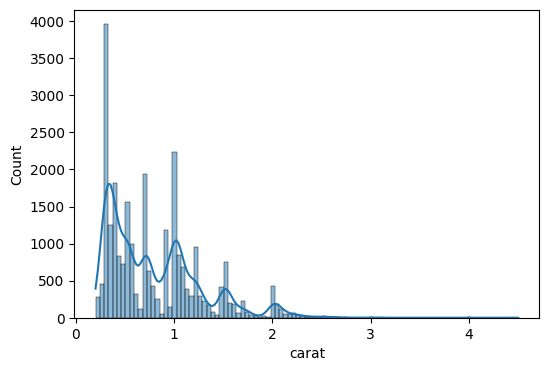

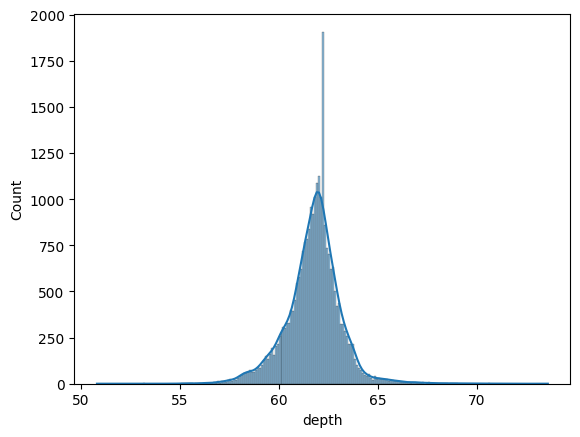

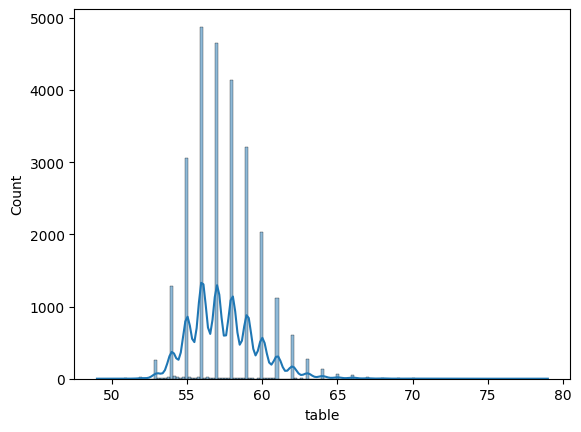

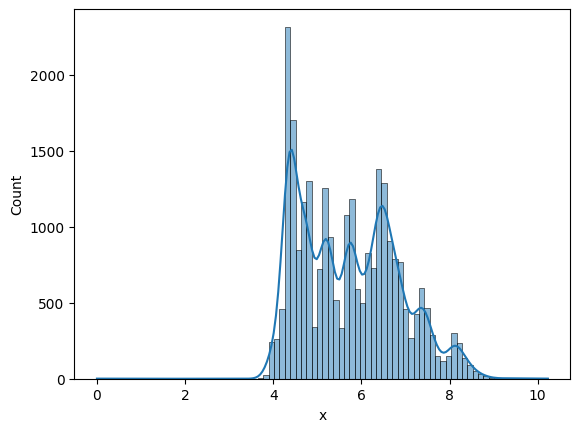

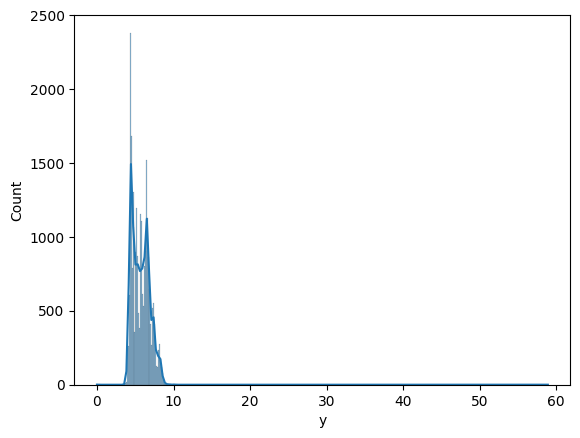

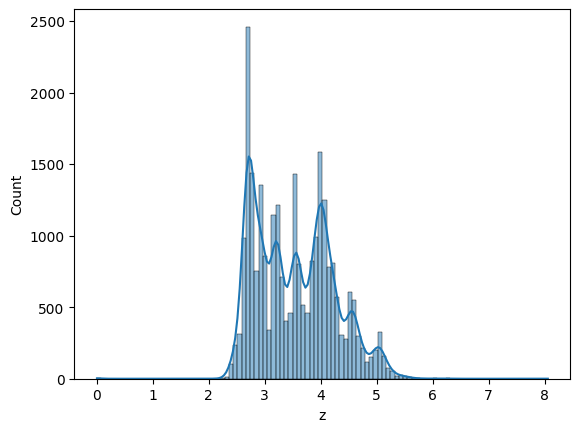

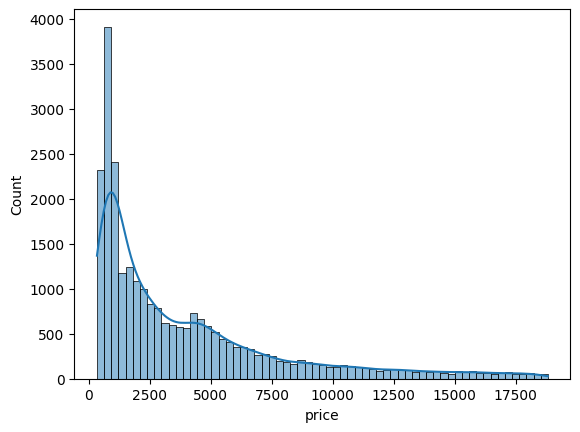

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

for col in neumerical_columns:
    sns.histplot(data,x=col,kde=True)
    print("\n")
    plt.show()


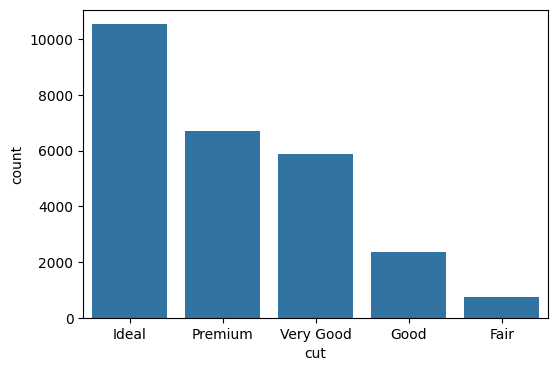

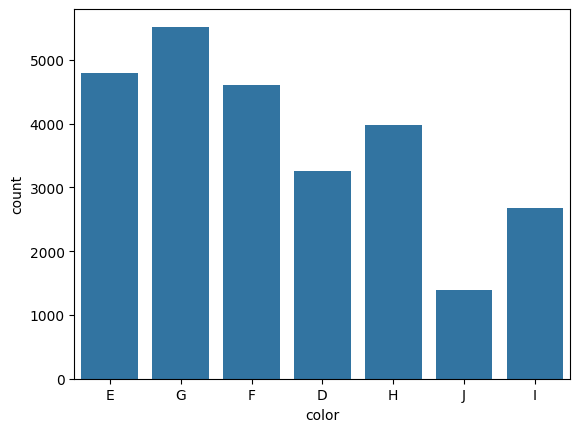

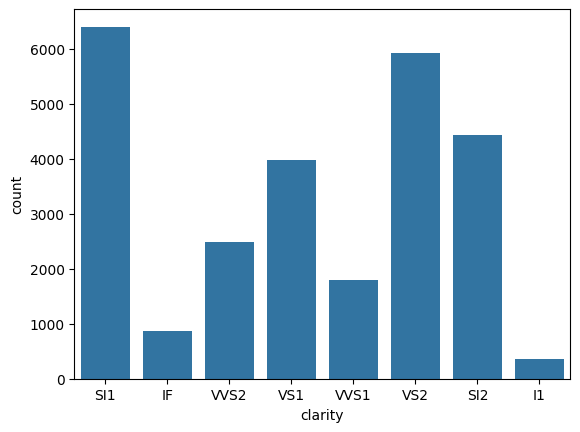

In [96]:
#categorical column
plt.figure(figsize=(6,4))

for col in categorical_columns:
    sns.countplot(data,x=col)
    print("\n")
    plt.show()

<Axes: >

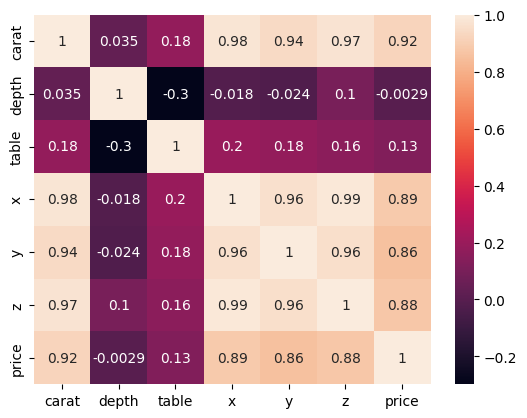

In [97]:
sns.heatmap(data[neumerical_columns].corr(),annot=True)

In [98]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [99]:
data["clarity"].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [100]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [101]:
data["color"].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [102]:
# lets do ordinal coding 
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map={"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map={"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}


In [103]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [105]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,4,4,3,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,5,5,8,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,4,2,4,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,3,3,6,61.8,56.0,4.19,4.20,2.60,682
